# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
import torch.nn as nn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
import plotly.graph_objs as go # plotly graphical object


import src.data.timeseries_eda as eda 

init_notebook_mode(connected=True)
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot')

# config

In [3]:
symbol = 'EURUSD'

# EDA

In [4]:
market_data = pd.read_csv(f'data/{symbol}_1h.csv')
market_data.head()

Unnamed: 0            open_time  open_bid  low_bid  high_bid  close_bid  \
0           0  2015-02-02 01:00:00   1.13082  1.13082   1.13157    1.13153   
1           1  2015-02-02 02:00:00   1.13152  1.13135   1.13255    1.13179   
2           2  2015-02-02 03:00:00   1.13180  1.13054   1.13180    1.13102   
3           3  2015-02-02 04:00:00   1.13101  1.13084   1.13132    1.13084   
4           4  2015-02-02 05:00:00   1.13085  1.13071   1.13134    1.13084   

   volume_bid  open_ask  low_ask  high_ask  close_ask  volume_ask  \
0     2712.48   1.13086  1.13086   1.13160    1.13156     2853.70   
1     2935.13   1.13156  1.13136   1.13257    1.13181     2945.25   
2     2610.78   1.13181  1.13057   1.13185    1.13103     2617.55   
3     1723.14   1.13103  1.13088   1.13136    1.13088     1489.47   
4     1966.10   1.13088  1.13073   1.13136    1.13085     1753.40   

            close_time  month  year  
0  2015-02-02 02:00:00      2  2015  
1  2015-02-02 03:00:00      2  2015  
2  2015-02-02 04:00:00      2  2015  
3  2015-02-02 05:00:00      2  2015  
4  2015-02-02 06:00:00      2  2015

In [5]:
market_data['open_time'] = pd.to_datetime(market_data['open_time'])
market_data.set_index('open_time', inplace=True)

market_data.drop(columns='close_time', inplace=True)

# Features Engineering

In [6]:
feature=['high_bid', 'low_ask']
target=['high_bid', 'low_ask']

# Models Training

In [7]:
from src.data.dataloader import CreateDataset

my_dataset = CreateDataset(market_data, 10, feature, target)

train_data, valid_data, test_data = my_dataset.dataset_split(0.7,0.2)

In [8]:
train_data

Unnamed: 0  open_bid  low_bid  high_bid  close_bid  \
open_time                                                                 
2015-02-02 01:00:00           0   1.13082  1.13082   1.13157    1.13153   
2015-02-02 02:00:00           1   1.13152  1.13135   1.13255    1.13179   
2015-02-02 03:00:00           2   1.13180  1.13054   1.13180    1.13102   
2015-02-02 04:00:00           3   1.13101  1.13084   1.13132    1.13084   
2015-02-02 05:00:00           4   1.13085  1.13071   1.13134    1.13084   
...                         ...       ...      ...       ...        ...   
2020-12-28 04:00:00       36854   1.22127  1.22091   1.22138    1.22102   
2020-12-28 05:00:00       36855   1.22102  1.22092   1.22236    1.22234   
2020-12-28 06:00:00       36856   1.22234  1.22197   1.22269    1.22249   
2020-12-28 07:00:00       36857   1.22249  1.22195   1.22329    1.22308   
2020-12-28 08:00:00       36858   1.22310  1.22257   1.22403    1.22390   

                     volume_bid  open_ask  low_ask  high_ask  close_ask  \
open_time                                                                 
2015-02-02 01:00:00   2712.4800   1.13086  1.13086   1.13160    1.13156   
2015-02-02 02:00:00   2935.1300   1.13156  1.13136   1.13257    1.13181   
2015-02-02 03:00:00   2610.7800   1.13181  1.13057   1.13185    1.13103   
2015-02-02 04:00:00   1723.1400   1.13103  1.13088   1.13136    1.13088   
2015-02-02 05:00:00   1966.1000   1.13088  1.13073   1.13136    1.13085   
...                         ...       ...      ...       ...        ...   
2020-12-28 04:00:00   2373.6900   1.22132  1.22096   1.22142    1.22107   
2020-12-28 05:00:00   4986.0800   1.22106  1.22095   1.22240    1.22237   
2020-12-28 06:00:00   5101.2000   1.22239  1.22202   1.22273    1.22252   
2020-12-28 07:00:00   4707.2603   1.22253  1.22200   1.22334    1.22313   
2020-12-28 08:00:00   8037.5000   1.22314  1.22262   1.22407    1.22395   

                     volume_ask  month  year  
open_time                                     
2015-02-02 01:00:00     2853.70      2  2015  
2015-02-02 02:00:00     2945.25      2  2015  
2015-02-02 03:00:00     2617.55      2  2015  
2015-02-02 04:00:00     1489.47      2  2015  
2015-02-02 05:00:00     1753.40      2  2015  
...                         ...    ...   ...  
2020-12-28 04:00:00     1524.27     12  2020  
2020-12-28 05:00:00     3208.70     12  2020  
2020-12-28 06:00:00     4954.25     12  2020  
2020-12-28 07:00:00     8950.07     12  2020  
2020-12-28 08:00:00    12564.12     12  2020  

[36859 rows x 13 columns]

In [9]:
class LSTMAutoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTMAutoencoder, self).__init__()
        self.encoder = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.decoder = nn.LSTM(hidden_size, input_size, batch_first=True)

    def forward(self, x):
        encoded, _,= self.encoder(x)
        decoded, _,= self.decoder(encoded)
        return decoded

    

In [10]:
class LSTMAutoencoderTrainer:
    def __init__(self, model, optimizer, criterion,mode=False):
        self.model = model
        self.optimizer = optimizer
        self.criterion = criterion
        
    def fit(self, train_loader, num_epochs):
        self.model.train()
        for epoch in range(num_epochs):
            total_loss = 0
            for batch in train_loader:
                
                inputs = batch['features'] 
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs, inputs)
                loss.backward()
                self.optimizer.step()
                total_loss += loss.item()
            if (epoch + 1) % 10 == 0:
            
                print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss}")

    def transform(self, data_loader, detection_mode=False):
        self.model.eval()
        with torch.no_grad():
            decoded_data = []
            idx_list = []
            for batch in data_loader:
                inputs = batch['features'] 
                if detection_mode==True:
                    inputs= batch['target']
                 
                idx = batch['idx']
                decoded = self.model(inputs)
                decoded_data.append(decoded)
                idx_list.append(idx)
        decoded_data = torch.cat(decoded_data)  
        idx_tensor = torch.cat(idx_list)

        return decoded_data, idx_tensor

In [11]:
from src.data.feature_engineering import Scalar
scalar = Scalar()
train_data[feature] = scalar.fit_transform(train_data[feature])
valid_data[feature] = scalar.transform(valid_data[feature])
test_data[feature] = scalar.transform(test_data[feature])

train_dataset = my_dataset.create_dataset(train_data)
valid_dataset = my_dataset.create_dataset(valid_data)
test_dataset = my_dataset.create_dataset(test_data)

train_loader = my_dataset.create_loader(train_dataset, 128)
valid_loader = my_dataset.create_loader(valid_dataset, 128)
test_loader = my_dataset.create_loader(test_dataset, 128)

In [12]:
DEVICE = 'cuda' 
BATCH_SIZE = 32 
MAX_WAIT = 3
EPOCHS = 25 
LR = 1e-4

In [35]:
from src.models import nn_trainer, lstm_forecaster
import torch
import torch.nn as nn
import torch.optim.lr_scheduler as lr_scheduler


input_size = len(feature)
hidden_size = 2
model = LSTMAutoencoder(input_size, hidden_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
trainer = LSTMAutoencoderTrainer(model, optimizer, criterion)


num_epochs = 200
trainer.fit(train_loader, num_epochs)


decoded_data,idx = trainer.transform(test_loader)

Epoch [10/200], Loss: 1.5608965482679196
Epoch [20/200], Loss: 0.3356213134393329
Epoch [30/200], Loss: 0.16869857587789738
Epoch [40/200], Loss: 0.10988671592303945
Epoch [50/200], Loss: 0.0859970466658524
Epoch [60/200], Loss: 0.07434248982167446
Epoch [70/200], Loss: 0.06721031314600623
Epoch [80/200], Loss: 0.06219038757490125
Epoch [90/200], Loss: 0.05844515634294112
Epoch [100/200], Loss: 0.055537942624596326
Epoch [110/200], Loss: 0.05316906118605402
Epoch [120/200], Loss: 0.0511442793185779
Epoch [130/200], Loss: 0.049337976981178144
Epoch [140/200], Loss: 0.0476708746462009
Epoch [150/200], Loss: 0.04615973995805689
Epoch [160/200], Loss: 0.0449318275279893
Epoch [170/200], Loss: 0.043954040245125725
Epoch [180/200], Loss: 0.043116853836750124
Epoch [190/200], Loss: 0.04237823746598224
Epoch [200/200], Loss: 0.04171766601439231


In [36]:
decoded_data

tensor([[[-0.0467, -0.0384],
         [-0.0788, -0.0611],
         [-0.0937, -0.0680],
         ...,
         [-0.1040, -0.0701],
         [-0.1041, -0.0702],
         [-0.1039, -0.0699]],

        [[-0.0466, -0.0383],
         [-0.0787, -0.0610],
         [-0.0925, -0.0670],
         ...,
         [-0.1040, -0.0702],
         [-0.1038, -0.0699],
         [-0.1036, -0.0698]],

        [[-0.0465, -0.0382],
         [-0.0774, -0.0599],
         [-0.0925, -0.0671],
         ...,
         [-0.1037, -0.0699],
         [-0.1036, -0.0698],
         [-0.1034, -0.0696]],

        ...,

        [[ 0.3884,  0.3844],
         [ 0.3995,  0.3984],
         [ 0.4025,  0.4016],
         ...,
         [ 0.4096,  0.4087],
         [ 0.4082,  0.4076],
         [ 0.4051,  0.4048]],

        [[ 0.3927,  0.3885],
         [ 0.4038,  0.4026],
         [ 0.4057,  0.4048],
         ...,
         [ 0.4082,  0.4076],
         [ 0.4051,  0.4048],
         [ 0.4105,  0.4093]],

        [[ 0.3969,  0.3926],
       

In [37]:
idx

tensor([1662397200000000000, 1662400800000000000, 1662404400000000000,
         ..., 1689300000000000000, 1689303600000000000,
        1689307200000000000])

In [38]:
decoded_data=decoded_data[:,-1,:]
decoded_data.shape


torch.Size([5256, 2])

In [39]:
idx

tensor([1662397200000000000, 1662400800000000000, 1662404400000000000,
         ..., 1689300000000000000, 1689303600000000000,
        1689307200000000000])

In [40]:
idx = pd.Series(idx)

idx= idx.shift(-1)

indexes_datetime = pd.to_datetime(idx)
indexes_datetime 

0                      NaT
1      2022-09-05 17:00:00
2      2022-09-05 18:00:00
3      2022-09-05 19:00:00
4      2022-09-05 20:00:00
               ...        
5251   2023-07-13 23:00:00
5252   2023-07-14 00:00:00
5253   2023-07-14 01:00:00
5254   2023-07-14 02:00:00
5255   2023-07-14 03:00:00
Length: 5256, dtype: datetime64[ns]

In [41]:
encoded_data = pd.concat([pd.DataFrame({'datetime': indexes_datetime}),
                           pd.DataFrame(decoded_data.numpy(), columns=['high_bid', 'low_ask'])
], axis=1)
print(encoded_data)

                datetime  high_bid   low_ask
0                    NaT -0.103851 -0.069922
1    2022-09-05 17:00:00 -0.103645 -0.069783
2    2022-09-05 18:00:00 -0.103375 -0.069615
3    2022-09-05 19:00:00 -0.103362 -0.069660
4    2022-09-05 20:00:00 -0.103378 -0.069698
...                  ...       ...       ...
5251 2023-07-13 23:00:00  0.409646  0.408665
5252 2023-07-14 00:00:00  0.408234  0.407593
5253 2023-07-14 01:00:00  0.405109  0.404767
5254 2023-07-14 02:00:00  0.410507  0.409283
5255 2023-07-14 03:00:00  0.413624  0.412386

[5256 rows x 3 columns]


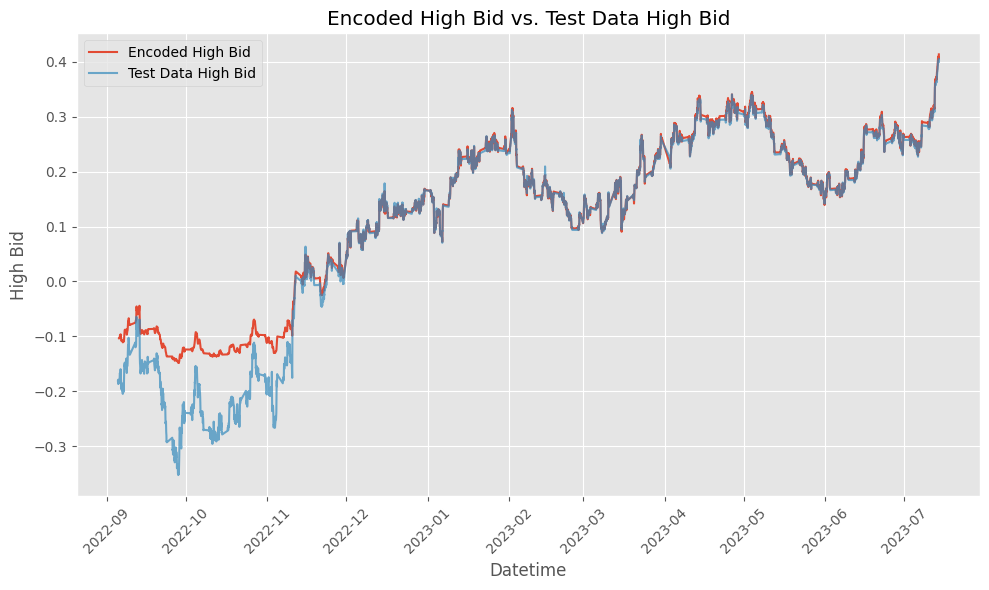

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(indexes_datetime, encoded_data['high_bid'], label='Encoded High Bid')
plt.plot(test_data.index, test_data['high_bid'], label='Test Data High Bid', alpha=0.7)
plt.xlabel('Datetime')
plt.ylabel('High Bid')
plt.title('Encoded High Bid vs. Test Data High Bid')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
test_data

Unnamed: 0  open_bid  low_bid  high_bid  close_bid  \
open_time                                                                 
2022-09-05 07:00:00       47390   0.99069  0.98935 -0.182138    0.99110   
2022-09-05 08:00:00       47391   0.99111  0.99041 -0.186157    0.99108   
2022-09-05 09:00:00       47392   0.99110  0.99069 -0.186202    0.99234   
2022-09-05 10:00:00       47393   0.99235  0.99216 -0.179023    0.99336   
2022-09-05 11:00:00       47394   0.99336  0.99123 -0.182590    0.99169   
...                         ...       ...      ...       ...        ...   
2023-07-14 00:00:00       52651   1.12244  1.12217  0.400713    1.12237   
2023-07-14 01:00:00       52652   1.12237  1.12134  0.399224    1.12229   
2023-07-14 02:00:00       52653   1.12229  1.12221  0.403287    1.12336   
2023-07-14 03:00:00       52654   1.12336  1.12311  0.405499    1.12337   
2023-07-14 04:00:00       52655   1.12337  1.12337  0.403603    1.12343   

                     volume_bid  open_ask   low_ask  high_ask  close_ask  \
open_time                                                                  
2022-09-05 07:00:00    38603.61   0.99075 -0.201598   0.99376    0.99116   
2022-09-05 08:00:00    24832.56   0.99117 -0.196812   0.99288    0.99114   
2022-09-05 09:00:00    23531.83   0.99116 -0.195593   0.99284    0.99240   
2022-09-05 10:00:00    22535.28   0.99239 -0.189001   0.99443    0.99341   
2022-09-05 11:00:00    20632.60   0.99339 -0.193110   0.99366    0.99174   
...                         ...       ...       ...       ...        ...   
2023-07-14 00:00:00     6880.17   1.12248  0.398004   1.12283    1.12241   
2023-07-14 01:00:00    16004.12   1.12240  0.394211   1.12249    1.12233   
2023-07-14 02:00:00    19662.13   1.12232  0.398185   1.12341    1.12340   
2023-07-14 03:00:00    13582.36   1.12339  0.402248   1.12387    1.12340   
2023-07-14 04:00:00      101.18   1.12339  0.403377   1.12348    1.12346   

                     volume_ask  month  year  
open_time                                     
2022-09-05 07:00:00   38934.310      9  2022  
2022-09-05 08:00:00   21838.750      9  2022  
2022-09-05 09:00:00   21776.220      9  2022  
2022-09-05 10:00:00   24824.670      9  2022  
2022-09-05 11:00:00   16818.640      9  2022  
...                         ...    ...   ...  
2023-07-14 00:00:00    4729.360      7  2023  
2023-07-14 01:00:00   11233.430      7  2023  
2023-07-14 02:00:00   13221.189      7  2023  
2023-07-14 03:00:00   12306.250      7  2023  
2023-07-14 04:00:00     152.750      7  2023  

[5266 rows x 13 columns]

# Evaluation

In [44]:
from src.eval.metrics import ForecastEval

In [45]:
indexes , high_bid_predictions, low_ask_predictions = train_rnn.predict(test_loader)
indexes_datetime = pd.to_datetime(indexes)
indexes_datetime 

NameError: name 'train_rnn' is not defined

In [ ]:
predictions = pd.DataFrame(
    data = {
        'high_bid_change_rate_target': high_bid_predictions,
        'low_ask_change_rate_target': low_ask_predictions,
    },
    index = indexes_datetime
)   
predictions[['last_open_ask','last_open_bid']] = test_data[['last_open_ask','last_open_bid']]
predictions.head()

high_bid_change_rate_target  low_ask_change_rate_target  \
2022-09-06 01:00:00                     0.064448                    0.061305   
2022-09-06 02:00:00                     0.064448                    0.061302   
2022-09-06 03:00:00                     0.064449                    0.061307   
2022-09-06 04:00:00                     0.064437                    0.061235   
2022-09-06 05:00:00                     0.064440                    0.061262   

                     last_open_ask  last_open_bid  
2022-09-06 01:00:00        0.99420        0.99413  
2022-09-06 02:00:00        0.99506        0.99501  
2022-09-06 03:00:00        0.99689        0.99682  
2022-09-06 04:00:00        0.99643        0.99640  
2022-09-06 05:00:00        0.99590        0.99585

In [ ]:
predictions = target_adder.retransform(predictions)
predictions

high_bid_change_rate_target  low_ask_change_rate_target  \
2022-09-06 01:00:00                     0.064448                    0.061305   
2022-09-06 02:00:00                     0.064448                    0.061302   
2022-09-06 03:00:00                     0.064449                    0.061307   
2022-09-06 04:00:00                     0.064437                    0.061235   
2022-09-06 05:00:00                     0.064440                    0.061262   
...                                          ...                         ...   
2023-07-14 00:00:00                     0.064371                    0.060874   
2023-07-14 01:00:00                     0.064378                    0.060919   
2023-07-14 02:00:00                     0.064409                    0.061097   
2023-07-14 03:00:00                     0.064433                    0.061239   
2023-07-14 04:00:00                     0.064435                    0.061242   

                     last_open_ask  last_open_bid  high_bid   low_ask  
2022-09-06 01:00:00        0.99420        0.99413  0.994841  0.993521  
2022-09-06 02:00:00        0.99506        0.99501  0.995701  0.994400  
2022-09-06 03:00:00        0.99689        0.99682  0.997532  0.996209  
2022-09-06 04:00:00        0.99643        0.99640  0.997072  0.995790  
2022-09-06 05:00:00        0.99590        0.99585  0.996542  0.995240  
...                            ...            ...       ...       ...  
2023-07-14 00:00:00        1.12239        1.12238  1.123113  1.121697  
2023-07-14 01:00:00        1.12250        1.12244  1.123223  1.121756  
2023-07-14 02:00:00        1.12248        1.12244  1.123203  1.121754  
2023-07-14 03:00:00        1.12240        1.12237  1.123123  1.121683  
2023-07-14 04:00:00        1.12232        1.12229  1.123043  1.121603  

[5248 rows x 6 columns]

In [ ]:
market_data

Unnamed: 0  open_bid  low_bid  high_bid  close_bid  \
open_time                                                                 
2015-02-02 01:00:00           0   1.13082  1.13082   1.13157    1.13153   
2015-02-02 02:00:00           1   1.13152  1.13135   1.13255    1.13179   
2015-02-02 03:00:00           2   1.13180  1.13054   1.13180    1.13102   
2015-02-02 04:00:00           3   1.13101  1.13084   1.13132    1.13084   
2015-02-02 05:00:00           4   1.13085  1.13071   1.13134    1.13084   
...                         ...       ...      ...       ...        ...   
2023-07-14 00:00:00       52651   1.12244  1.12217   1.12280    1.12237   
2023-07-14 01:00:00       52652   1.12237  1.12134   1.12247    1.12229   
2023-07-14 02:00:00       52653   1.12229  1.12221   1.12337    1.12336   
2023-07-14 03:00:00       52654   1.12336  1.12311   1.12386    1.12337   
2023-07-14 04:00:00       52655   1.12337  1.12337   1.12344    1.12343   

                     volume_bid  open_ask  low_ask  high_ask  close_ask  \
open_time                                                                 
2015-02-02 01:00:00     2712.48   1.13086  1.13086   1.13160    1.13156   
2015-02-02 02:00:00     2935.13   1.13156  1.13136   1.13257    1.13181   
2015-02-02 03:00:00     2610.78   1.13181  1.13057   1.13185    1.13103   
2015-02-02 04:00:00     1723.14   1.13103  1.13088   1.13136    1.13088   
2015-02-02 05:00:00     1966.10   1.13088  1.13073   1.13136    1.13085   
...                         ...       ...      ...       ...        ...   
2023-07-14 00:00:00     6880.17   1.12248  1.12220   1.12283    1.12241   
2023-07-14 01:00:00    16004.12   1.12240  1.12136   1.12249    1.12233   
2023-07-14 02:00:00    19662.13   1.12232  1.12224   1.12341    1.12340   
2023-07-14 03:00:00    13582.36   1.12339  1.12314   1.12387    1.12340   
2023-07-14 04:00:00      101.18   1.12339  1.12339   1.12348    1.12346   

                     volume_ask  month  year  
open_time                                     
2015-02-02 01:00:00    2853.700      2  2015  
2015-02-02 02:00:00    2945.250      2  2015  
2015-02-02 03:00:00    2617.550      2  2015  
2015-02-02 04:00:00    1489.470      2  2015  
2015-02-02 05:00:00    1753.400      2  2015  
...                         ...    ...   ...  
2023-07-14 00:00:00    4729.360      7  2023  
2023-07-14 01:00:00   11233.430      7  2023  
2023-07-14 02:00:00   13221.189      7  2023  
2023-07-14 03:00:00   12306.250      7  2023  
2023-07-14 04:00:00     152.750      7  2023  

[52656 rows x 13 columns]

In [ ]:
orginal_test_data = market_data[['open_ask','open_bid','low_ask','high_bid','close_bid','close_ask']].loc[predictions.index]

<Axes: >

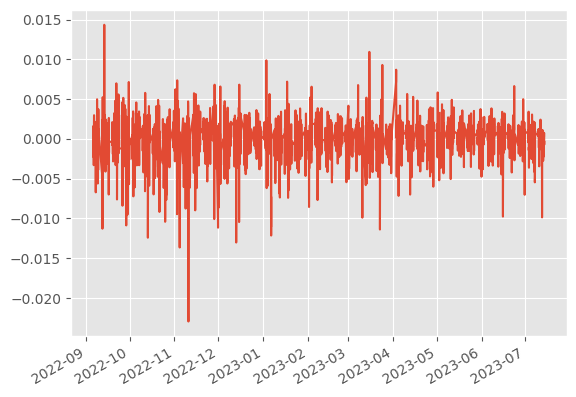

In [ ]:
(predictions['high_bid'] - orginal_test_data['high_bid']).plot()

In [ ]:
def add_noise_to_feature(feature_data, noise_std):
    noisy_feature_data = feature_data + np.random.normal(0, noise_std, size=feature_data.shape)
    return noisy_feature_data

In [ ]:
results = pd.DataFrame(columns=['Feature', 'High Bid Loss', 'Low Ask Loss'])
noise_std = 0.5
for feature_name in feature:
    noisy_data = test_data.copy()
    noisy_feature_data = add_noise_to_feature(noisy_data[feature_name], noise_std)
    noisy_data[feature_name] = noisy_feature_data

    
    test_dataset.features_data = noisy_data[feature].values
    test_loader = my_dataset.create_loader(test_dataset, batch_size=128)


    indexes, high_bid_predictions, low_ask_predictions = train_rnn.predict(test_loader)
    indexes = pd.to_datetime(indexes)
    high_bid_target = test_dataset.target_data[10:][:, 0]  
    low_ask_target = test_dataset.target_data[10:][:, 1]  

    high_bid_loss = loss_fn(torch.tensor(high_bid_predictions), torch.tensor(high_bid_target)).item()
    low_ask_loss = loss_fn(torch.tensor(low_ask_predictions), torch.tensor(low_ask_target)).item()

    
    new_row = {'Feature': feature_name,
               'High Bid Loss': high_bid_loss,
               'Low Ask Loss': low_ask_loss}
    results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)

print(results)
    
    


                   Feature  High Bid Loss  Low Ask Loss
0               volume_bid       0.042231      0.040077
1               volume_ask       0.042235      0.040026
2                    month       0.042247      0.040054
3         bid_golden/death       0.042227      0.040043
4   bid_standard_deviation       0.042230      0.040053
5      bid_bollinger_touch       0.042234      0.040044
6         ask_golden/death       0.042224      0.040021
7   ask_standard_deviation       0.042235      0.040045
8      ask_bollinger_touch       0.042244      0.040052
9               hhpc_bid_1       0.042222      0.040025
10              llpc_bid_1       0.042235      0.040047
11              hhpc_bid_3       0.042234      0.040062
12              llpc_bid_3       0.042240      0.040045
13            hplpcp_bid_1       0.042231      0.040044
14            hplpcp_bid_3       0.042233      0.040047
15            hplpcp_bid_4       0.042231      0.040050
16             vvpavg3_bid       0.042233      0

In [ ]:
results = pd.DataFrame(columns=['Feature', 'High Bid Loss', 'Low Ask Loss'])
noise_std = 0.5
for feature_name in feature:
    noisy_data = test_data.copy()
    noisy_feature_data = add_noise_to_feature(noisy_data[feature_name], noise_std)
    noisy_data[feature_name] = noisy_feature_data

    test_dataset.features_data = noisy_data[feature].values
    test_loader = my_dataset.create_loader(test_dataset, batch_size=128)

    indexes, high_bid_predictions, low_ask_predictions = train_rnn.predict(test_loader)
    indexes_datetime = pd.to_datetime(indexes)
    
    predictions = pd.DataFrame(
        data = {
            'high_bid_change_rate_target': high_bid_predictions,
            'low_ask_change_rate_target': low_ask_predictions,
        },
        index = indexes_datetime
    )
    
    predictions[['last_open_ask', 'last_open_bid']] = test_data[['last_open_ask', 'last_open_bid']]
    predictions = target_adder.retransform(predictions)
    orginal_test_data = market_data[['low_ask', 'high_bid']].loc[predictions.index]
    
    
    high_bid_diff = abs(predictions['high_bid'] - orginal_test_data['high_bid'])
    low_ask_diff = abs(predictions['low_ask'] - orginal_test_data['low_ask'])
    
    
    high_bid_loss = high_bid_diff.sum()
    low_ask_loss = low_ask_diff.sum()
    
    
    new_row = {'Feature': feature_name,
               'High Bid Loss': high_bid_loss,
               'Low Ask Loss': low_ask_loss}
    results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)

print(results)

                   Feature  High Bid Loss  Low Ask Loss
0               volume_bid       7.273560      7.317123
1               volume_ask       7.272400      7.314251
2                    month       7.272971      7.312847
3         bid_golden/death       7.273227      7.310689
4   bid_standard_deviation       7.273565      7.310047
5      bid_bollinger_touch       7.272728      7.310893
6         ask_golden/death       7.273685      7.311335
7   ask_standard_deviation       7.272649      7.310273
8      ask_bollinger_touch       7.273150      7.310499
9               hhpc_bid_1       7.272540      7.311708
10              llpc_bid_1       7.272718      7.310798
11              hhpc_bid_3       7.273244      7.313361
12              llpc_bid_3       7.274239      7.311398
13            hplpcp_bid_1       7.272940      7.310974
14            hplpcp_bid_3       7.273376      7.310952
15            hplpcp_bid_4       7.273492      7.309786
16             vvpavg3_bid       7.273153      7

In [ ]:
evaluator= ForecastEval(orginal_data= orginal_test_data , predicted_data = predictions)
evaluator.run_evaluation()

KeyError: 'open_bid'

In [ ]:
(orginal_test_data['high_bid']>predictions['high_bid']).mean()*100

46.81783536585366

In [ ]:
(orginal_test_data['low_ask']>predictions['low_ask']).mean()*100

53.33460365853659

In [ ]:
predictions

high_bid_change_rate_target  low_ask_change_rate_target  \
2022-09-06 01:00:00                     0.063299                    0.057346   
2022-09-06 02:00:00                     0.063317                    0.057339   
2022-09-06 03:00:00                     0.063340                    0.057336   
2022-09-06 04:00:00                     0.063311                    0.057313   
2022-09-06 05:00:00                     0.063331                    0.057330   
...                                          ...                         ...   
2023-07-14 00:00:00                     0.063064                    0.057255   
2023-07-14 01:00:00                     0.063070                    0.057267   
2023-07-14 02:00:00                     0.063163                    0.057312   
2023-07-14 03:00:00                     0.063243                    0.057356   
2023-07-14 04:00:00                     0.063252                    0.057349   

                     last_open_ask  last_open_bid  high_bid   low_ask  
2022-09-06 01:00:00        0.99420        0.99413  0.994829  0.993560  
2022-09-06 02:00:00        0.99506        0.99501  0.995690  0.994439  
2022-09-06 03:00:00        0.99689        0.99682  0.997521  0.996248  
2022-09-06 04:00:00        0.99643        0.99640  0.997061  0.995829  
2022-09-06 05:00:00        0.99590        0.99585  0.996531  0.995279  
...                            ...            ...       ...       ...  
2023-07-14 00:00:00        1.12239        1.12238  1.123098  1.121737  
2023-07-14 01:00:00        1.12250        1.12244  1.123208  1.121797  
2023-07-14 02:00:00        1.12248        1.12244  1.123189  1.121797  
2023-07-14 03:00:00        1.12240        1.12237  1.123110  1.121726  
2023-07-14 04:00:00        1.12232        1.12229  1.123030  1.121646  

[5248 rows x 6 columns]

In [ ]:
orginal_test_data

open_ask  open_bid  low_ask  high_bid  close_bid  \
2022-09-06 01:00:00   0.99689   0.99682  0.99615   0.99706    0.99640   
2022-09-06 02:00:00   0.99643   0.99640  0.99497   0.99642    0.99585   
2022-09-06 03:00:00   0.99590   0.99585  0.99430   0.99589    0.99440   
2022-09-06 04:00:00   0.99446   0.99440  0.99443   0.99548    0.99461   
2022-09-06 05:00:00   0.99467   0.99461  0.99451   0.99649    0.99590   
...                       ...       ...      ...       ...        ...   
2023-07-14 00:00:00   1.12248   1.12244  1.12220   1.12280    1.12237   
2023-07-14 01:00:00   1.12240   1.12237  1.12136   1.12247    1.12229   
2023-07-14 02:00:00   1.12232   1.12229  1.12224   1.12337    1.12336   
2023-07-14 03:00:00   1.12339   1.12336  1.12314   1.12386    1.12337   
2023-07-14 04:00:00   1.12339   1.12337  1.12339   1.12344    1.12343   

                     close_ask  
2022-09-06 01:00:00    0.99646  
2022-09-06 02:00:00    0.99591  
2022-09-06 03:00:00    0.99444  
2022-09-06 04:00:00    0.99466  
2022-09-06 05:00:00    0.99597  
...                        ...  
2023-07-14 00:00:00    1.12241  
2023-07-14 01:00:00    1.12233  
2023-07-14 02:00:00    1.12340  
2023-07-14 03:00:00    1.12340  
2023-07-14 04:00:00    1.12346  

[5248 rows x 6 columns]

In [ ]:

predictions=predictions.rename(columns={"high_bid":"predicted.high_bid","low_ask":"predicted.low_ask"})
selected_cols_prediction = predictions[["predicted.high_bid", "predicted.low_ask"]]
selected_cols_original_test = orginal_test_data[["high_bid","low_ask","open_bid", "open_ask","close_bid","close_ask"]]


merged_data = pd.concat([selected_cols_prediction, selected_cols_original_test], axis=1)

print(merged_data)







                     predicted.high_bid  predicted.low_ask  high_bid  low_ask  \
2022-09-06 01:00:00            0.994829           0.993560   0.99706  0.99615   
2022-09-06 02:00:00            0.995690           0.994439   0.99642  0.99497   
2022-09-06 03:00:00            0.997521           0.996248   0.99589  0.99430   
2022-09-06 04:00:00            0.997061           0.995829   0.99548  0.99443   
2022-09-06 05:00:00            0.996531           0.995279   0.99649  0.99451   
...                                 ...                ...       ...      ...   
2023-07-14 00:00:00            1.123098           1.121737   1.12280  1.12220   
2023-07-14 01:00:00            1.123208           1.121797   1.12247  1.12136   
2023-07-14 02:00:00            1.123189           1.121797   1.12337  1.12224   
2023-07-14 03:00:00            1.123110           1.121726   1.12386  1.12314   
2023-07-14 04:00:00            1.123030           1.121646   1.12344  1.12339   

                     open_b

In [ ]:

from src.eval.forecast_features_adder import ForecastsAggergator, ForecastMetricsAdder
aggregator = ForecastsAggergator(quantiles=[0.5])
merged_data = aggregator.transform(merged_data)
merged_data

high_bid  low_ask  open_bid  open_ask  close_bid  \
2022-09-06 01:00:00   0.99706  0.99615   0.99682   0.99689    0.99640   
2022-09-06 02:00:00   0.99642  0.99497   0.99640   0.99643    0.99585   
2022-09-06 03:00:00   0.99589  0.99430   0.99585   0.99590    0.99440   
2022-09-06 04:00:00   0.99548  0.99443   0.99440   0.99446    0.99461   
2022-09-06 05:00:00   0.99649  0.99451   0.99461   0.99467    0.99590   
...                       ...      ...       ...       ...        ...   
2023-07-14 00:00:00   1.12280  1.12220   1.12244   1.12248    1.12237   
2023-07-14 01:00:00   1.12247  1.12136   1.12237   1.12240    1.12229   
2023-07-14 02:00:00   1.12337  1.12224   1.12229   1.12232    1.12336   
2023-07-14 03:00:00   1.12386  1.12314   1.12336   1.12339    1.12337   
2023-07-14 04:00:00   1.12344  1.12339   1.12337   1.12339    1.12343   

                     close_ask  high_q50   low_q50  high_q50_pct  high_pct  \
2022-09-06 01:00:00    0.99646  0.994829  0.993560           NaN       NaN   
2022-09-06 02:00:00    0.99591  0.995690  0.994439     -0.077269 -0.004014   
2022-09-06 03:00:00    0.99444  0.997521  0.996248      0.161806 -0.002005   
2022-09-06 04:00:00    0.99466  0.997061  0.995829      0.263546  0.104580   
2022-09-06 05:00:00    0.99597  0.996531  0.995279      0.188071  0.183981   
...                        ...       ...       ...           ...       ...   
2023-07-14 00:00:00    1.12241  1.123098  1.121737      0.054148  0.027612   
2023-07-14 01:00:00    1.12233  1.123208  1.121797      0.071083  0.005342   
2023-07-14 02:00:00    1.12340  1.123189  1.121797      0.076544  0.092673   
2023-07-14 03:00:00    1.12340  1.123110  1.121726     -0.025822  0.040950   
2023-07-14 04:00:00    1.12346  1.123030  1.121646     -0.032939  0.003565   

                     low_q50_pct   low_pct  
2022-09-06 01:00:00          NaN       NaN  
2022-09-06 02:00:00     0.196759  0.143514  
2022-09-06 03:00:00    -0.040007  0.155648  
2022-09-06 04:00:00    -0.143695 -0.003015  
2022-09-06 05:00:00    -0.067272  0.010056  
...                          ...       ...  
2023-07-14 00:00:00     0.062594  0.021379  
2023-07-14 01:00:00     0.051036  0.089994  
2023-07-14 02:00:00     0.043958  0.004461  
2023-07-14 03:00:00     0.145437  0.019589  
2023-07-14 04:00:00     0.153436 -0.001772  

[5248 rows x 12 columns]

In [ ]:
merged_data.reset_index(drop=False, inplace=True)


merged_data.rename(columns={'index': 'open_time'}, inplace=True)



In [ ]:
metricsadder=ForecastMetricsAdder(quantiles=[0.5])
metric_data=metricsadder._add_metrics(merged_data)
metric_data

open_time  high_q50_error  high_q50_abs_error  \
0    2022-09-06 01:00:00       -0.002231            0.002231   
1    2022-09-06 02:00:00       -0.000730            0.000730   
2    2022-09-06 03:00:00        0.001631            0.001631   
3    2022-09-06 04:00:00        0.001581            0.001581   
4    2022-09-06 05:00:00        0.000041            0.000041   
...                  ...             ...                 ...   
5243 2023-07-14 00:00:00        0.000298            0.000298   
5244 2023-07-14 01:00:00        0.000738            0.000738   
5245 2023-07-14 02:00:00       -0.000181            0.000181   
5246 2023-07-14 03:00:00       -0.000750            0.000750   
5247 2023-07-14 04:00:00       -0.000410            0.000410   

      high_q50_pct_error  high_q50_abs_pct_error  high_q50_accuracy  \
0                    NaN                     NaN                  0   
1              -0.073255                0.073255                  1   
2               0.163811                0.163811                  0   
3               0.158967                0.158967                  0   
4               0.004091                0.004091                  1   
...                  ...                     ...                ...   
5243            0.026536                0.026536                  0   
5244            0.065741                0.065741                  0   
5245           -0.016130                0.016130                  1   
5246           -0.066772                0.066772                  1   
5247           -0.036504                0.036504                  1   

      low_q50_error  low_q50_abs_error  low_q50_pct_error  \
0          0.002590           0.002590                NaN   
1          0.000531           0.000531           0.053245   
2         -0.001948           0.001948          -0.195655   
3         -0.001399           0.001399          -0.140680   
4         -0.000769           0.000769          -0.077328   
...             ...                ...                ...   
5243       0.000463           0.000463           0.041215   
5244      -0.000437           0.000437          -0.038958   
5245       0.000443           0.000443           0.039496   
5246       0.001414           0.001414           0.125847   
5247       0.001744           0.001744           0.155208   

      low_q50_abs_pct_error  low_q50_accuracy  
0                       NaN                 0  
1                  0.053245                 0  
2                  0.195655                 1  
3                  0.140680                 1  
4                  0.077328                 1  
...                     ...               ...  
5243               0.041215                 0  
5244               0.038958                 1  
5245               0.039496                 0  
5246               0.125847                 0  
5247               0.155208                 0  

[5248 rows x 11 columns]

In [ ]:
from src.eval.plots import *

prepare_summary_reports(metric_data)

In [ ]:
metric="abs_error"
metric_data['open_time'] = pd.to_datetime(metric_data['open_time'])
metric_data.set_index('open_time', inplace=True)


In [ ]:
metric_mean_plot(metric_data, metric, period="D")

In [ ]:
resduial_error(metric_data, side="high")

In [ ]:
merged_data['open_avg'] = (merged_data['open_ask'] + merged_data['open_bid']) / 2
merged_data['close_avg'] = (merged_data['close_ask'] + merged_data['close_bid']) / 2
plot_candlestick(merged_data, year=2023)